In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
apps_df = pd.read_csv('E:/Analyzing Google Play Store Data/apps.csv')
reviews_df = pd.read_csv('E:/Analyzing Google Play Store Data/user_reviews.csv')


In [2]:
# Drop the unnecessary index column
apps_df = apps_df.drop(columns=['Unnamed: 0'])

# Convert appropriate columns to correct data types
apps_df['Reviews'] = apps_df['Reviews'].astype(int)

# Handle 'Installs' column by removing commas and plus signs, and converting to int
apps_df['Installs'] = apps_df['Installs'].str.replace('[+,]', '', regex=True).astype(int)

# Handle 'Price' column by removing dollar signs and converting to float
apps_df['Price'] = apps_df['Price'].str.replace('$', '').astype(float)

# Convert 'Last Updated' column to datetime format
apps_df['Last Updated'] = pd.to_datetime(apps_df['Last Updated'])

# Handle missing values in 'Rating' and 'Size' by filling with median values
apps_df['Rating'].fillna(apps_df['Rating'].median(), inplace=True)
apps_df['Size'].fillna(apps_df['Size'].median(), inplace=True)

C:\Users\abish\AppData\Local\Temp\ipykernel_8612\1987629948.py:11: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  apps_df['Price'] = apps_df['Price'].str.replace('$', '').astype(float)


In [3]:
reviews_df.dropna(subset=['Sentiment', 'Sentiment_Polarity', 'Sentiment_Subjectivity'], inplace=True)


In [4]:
sns.set(style="whitegrid")

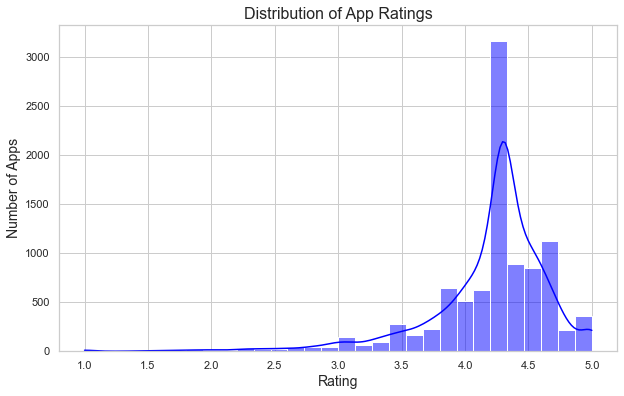

In [5]:
# Plot the distribution of app ratings
plt.figure(figsize=(10, 6))
sns.histplot(apps_df['Rating'], bins=30, kde=True, color='blue')
plt.title('Distribution of App Ratings', fontsize=16)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Number of Apps', fontsize=14)
plt.show()

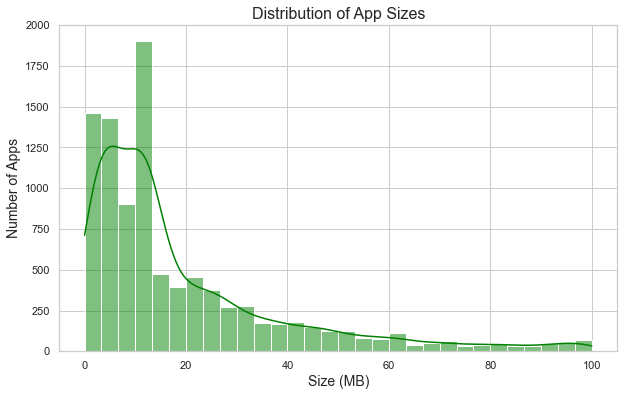

In [6]:
# Plot the distribution of app sizes
plt.figure(figsize=(10, 6))
sns.histplot(apps_df['Size'], bins=30, kde=True, color='green')
plt.title('Distribution of App Sizes', fontsize=16)
plt.xlabel('Size (MB)', fontsize=14)
plt.ylabel('Number of Apps', fontsize=14)
plt.show()

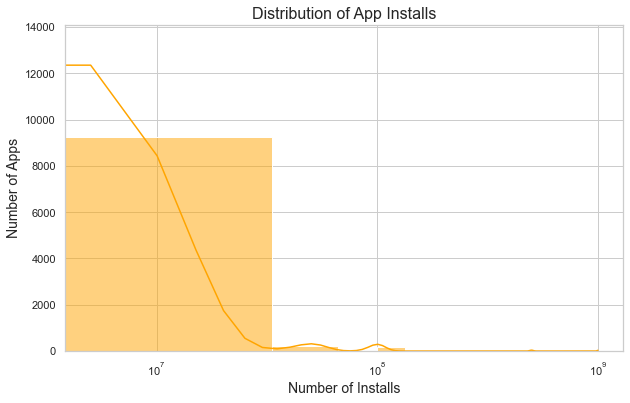

In [7]:
# Plot the distribution of app installs
plt.figure(figsize=(10, 6))
sns.histplot(apps_df['Installs'], bins=30, kde=True, color='orange')
plt.title('Distribution of App Installs', fontsize=16)
plt.xlabel('Number of Installs', fontsize=14)
plt.ylabel('Number of Apps', fontsize=14)
plt.xscale('log')
plt.show()

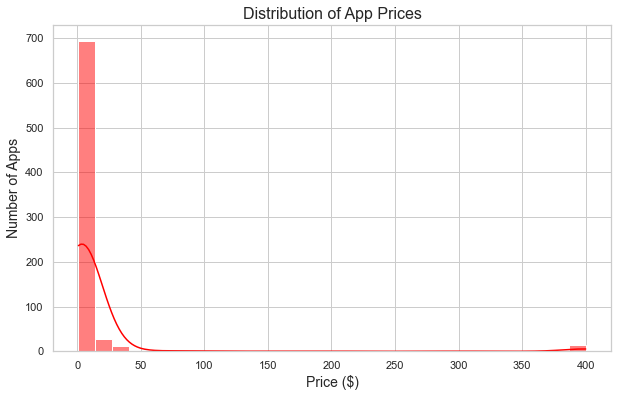

In [8]:
# Plot the distribution of app prices
plt.figure(figsize=(10, 6))
sns.histplot(apps_df[apps_df['Price'] > 0]['Price'], bins=30, kde=True, color='red')
plt.title('Distribution of App Prices', fontsize=16)
plt.xlabel('Price ($)', fontsize=14)
plt.ylabel('Number of Apps', fontsize=14)
plt.show()